In [1]:
"""
重力位、重力及重力梯度球型棱柱体三维正演
"""
import time
# 3rd imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# local imports
from geoist import gridder
from geoist.inversion.geometry import Tesseroid
from geoist.pfm import polyprism,giutils,tesseroid
from geoist.vis import giplt


In [2]:
#模型
model = [Tesseroid(-60, -55, -30, -27, 0, -500000, props={'density': 200}),
         Tesseroid(-66, -62, -18, -12, 0, -300000, props={'density': -500})]

# 计算点
area = (-80, -30, -40, 10)
shape = (100, 100)
lons, lats, heights = gridder.regular(area, shape, z=250000)

Time it took: 5.622321605682373


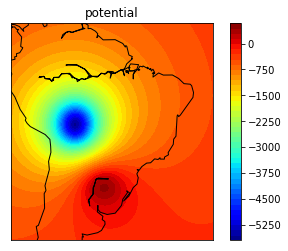

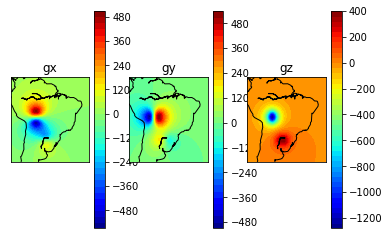

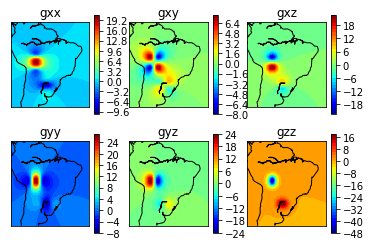

In [5]:
#正演计算
start = time.time()
fields = [
    tesseroid.potential(lons, lats, heights, model),
    tesseroid.gx(lons, lats, heights, model),
    tesseroid.gy(lons, lats, heights, model),
    tesseroid.gz(lons, lats, heights, model),
    tesseroid.gxx(lons, lats, heights, model),
    tesseroid.gxy(lons, lats, heights, model),
    tesseroid.gxz(lons, lats, heights, model),
    tesseroid.gyy(lons, lats, heights, model),
    tesseroid.gyz(lons, lats, heights, model),
    tesseroid.gzz(lons, lats, heights, model)]
print("Time it took: %s" % (time.time() - start))

titles = ['potential', 'gx', 'gy', 'gz',
          'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
#成图
bm = giplt.basemap(area, 'merc')
plt.figure()
plt.title(titles[0])
giplt.contourf(lons, lats, fields[0], shape, 40, basemap=bm)
giplt.draw_coastlines(bm)
plt.colorbar()
plt.figure()
for i, field in enumerate(fields[1:4]):
    plt.subplot(1, 3, i + 1)
    plt.title(titles[i + 1])
    giplt.contourf(lons, lats, field, shape, 40, basemap=bm)
    giplt.draw_coastlines(bm)
    plt.colorbar()
plt.figure()
for i, field in enumerate(fields[4:]):
    plt.subplot(2, 3, i + 1)
    plt.title(titles[i + 4])
    giplt.contourf(lons, lats, field, shape, 40, basemap=bm)
    giplt.draw_coastlines(bm)
    plt.colorbar()
plt.show()
